# Australia Fire Data Visualization
## Olivia Wang
#### Packages: matplotlib, pandas, numpy
#### Source: https://www.kaggle.com/carlosparadis/fires-from-space-australia-and-new-zeland

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('fire_nrt_V1_96617.csv')
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


# Density Plots
## 1.1 Plot the longitude vs latitude several ways within a single figure (each in its own axes):
1. Use the matplotlib defaults.
2. Adjust alpha and marker size to compensate for overplotting.
3. Use a hexbin plot.
4. Subsample the dataset.

### 1.1 Plot the longitude vs latitude several ways within a single figure (each in its own axes):

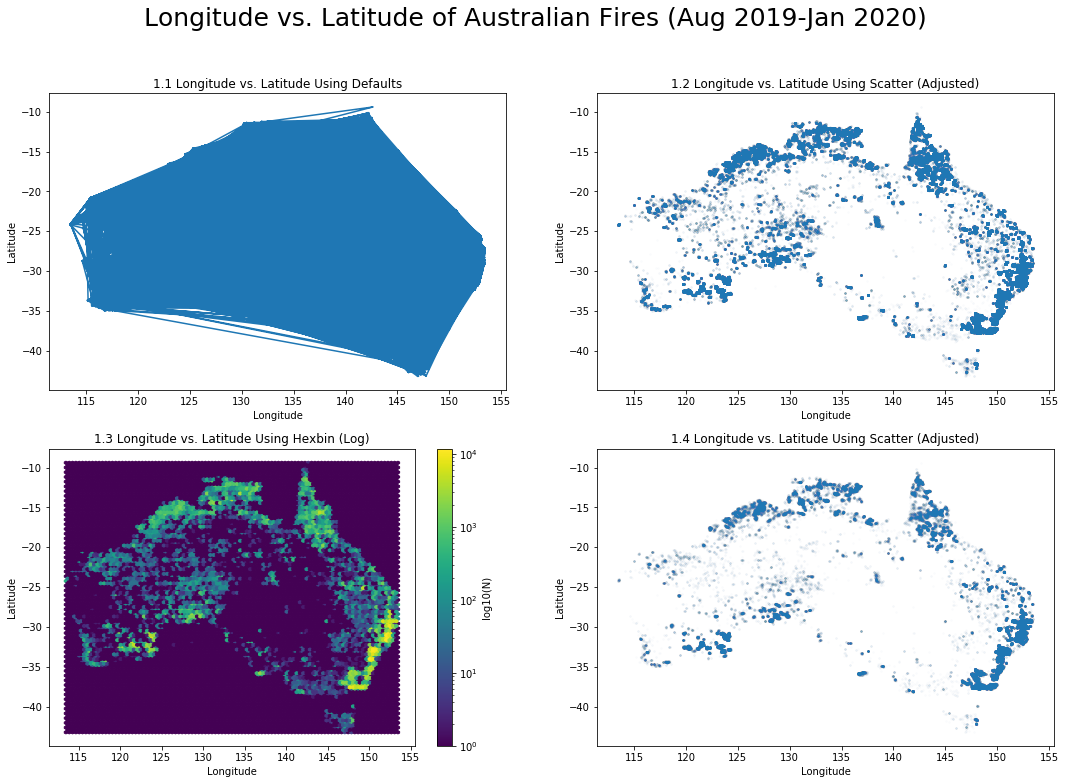

In [3]:
fig, ax = plt.subplots(2,2, figsize = (18, 12))
fig.suptitle('Longitude vs. Latitude of Australian Fires (Aug 2019-Jan 2020)', fontsize = 25)
#1.11 Using Defaults
ax[0,0].plot(df.longitude, df.latitude)
ax[0,0].title.set_text('1.1 Longitude vs. Latitude Using Defaults')
ax[0,0].set_xlabel('Longitude')
ax[0,0].set_ylabel('Latitude')
#1.12 Using Scatterplot with Adjusted Alpha and Size
ax[0,1].scatter(df.longitude, df.latitude, alpha = 0.01, s = 3)
ax[0,1].title.set_text('1.2 Longitude vs. Latitude Using Scatter (Adjusted)')
ax[0,1].set_xlabel('Longitude')
ax[0,1].set_ylabel('Latitude')
#1.13 Using Hexbin with Bins = 'log'
a = ax[1,0].hexbin(df.longitude, df.latitude, bins = 'log')
ax[1,0].title.set_text('1.3 Longitude vs. Latitude Using Hexbin (Log)')
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_ylabel('Latitude')
b = fig.colorbar(a, ax = ax[1,0])
b.set_label('log10(N)')
#1.14 Using Scatterplot on Subsample
sample = df.sample(frac=0.2, replace=False, random_state=1)
ax[1,1].scatter(sample.longitude, sample.latitude, alpha = 0.01, s = 3)
ax[1,1].title.set_text('1.4 Longitude vs. Latitude Using Scatter (Adjusted)')
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_ylabel('Latitude');

### 1.2 In what areas are most of the anomalies (measurements) located?
#### Most of the anomalies can be seen to be located in the coastal regions. We can see that the coast of New South Wales (bottom right) has the most anomalies, followed by the coast of Queensland, Northern Territory, and northern coast of Western Australia (top). This is followed by the Southern coast of Australia, specifically the southern coast of Western Australia. The rest of the anomalies are spread across the rest of Australia.

# Visualize class membership 
Visualize the distribution of Brightness temperature I-4 as a histogram (with appropriate settings). We are certain of a fire if this value is saturated.
1. Small multiples plot of whether the brightness is saturated, 
2. Plot both groups in the same axes with different colors.

### 2.1 Visualize the distribution of Brightness Temperature I-4 as a histogram

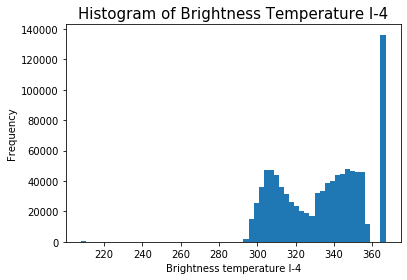

In [4]:
df.bright_ti4.plot(kind = 'hist', bins = 60)
plt.title('Histogram of Brightness Temperature I-4', fontsize = 15)
plt.xlabel('Brightness temperature I-4');

### 2.2 Find cutoff

In [5]:
max_brightness = df.bright_ti4.max()
print(max_brightness)

367.0


#### From the histogram, we can see that there is a clear gap in distribution between the maximum brightness temperature I-4 level and the rest of the brightness temperature I-4 level. As a result we define any brightness temperature I-4 value of bigger than or equal to the maximum brightness temperature I-4 value (367.0) to be saturated, and any value that is smaller than the maximum to be unsaturated.

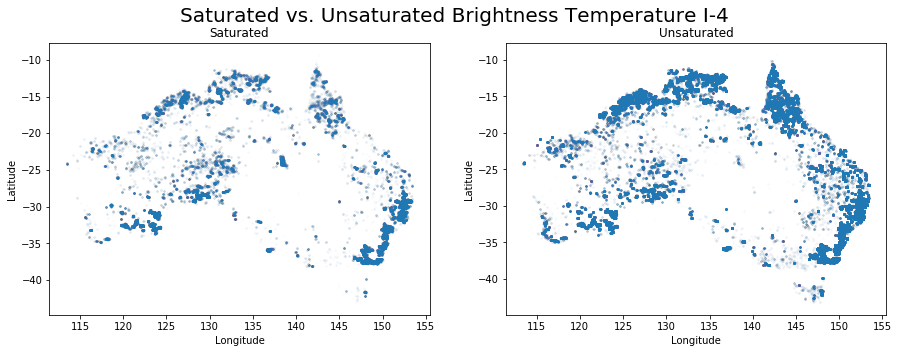

In [6]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
# From the histogram, we define brightness of above 360.0 to be saturated 
df['saturated'] = df.bright_ti4 >= max_brightness
fig.suptitle('Saturated vs. Unsaturated Brightness Temperature I-4', fontsize = 20)
ax[0].scatter('longitude', 'latitude', data = df[df.saturated == True], alpha = 0.01, s = 3)
ax[0].title.set_text('Saturated')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude');
ax[1].scatter('longitude', 'latitude', data = df[df.saturated == False], alpha = 0.01, s = 3)
ax[1].title.set_text('Unsaturated')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude');

### Differences in the distributions? 
#### It is clear that there are more anomalies with unsaturated brightness temperature I-4 than there are anomalies with saturated brightness in places with more anomalies overall. 

### 2.3 Brightness Temperature by Saturation

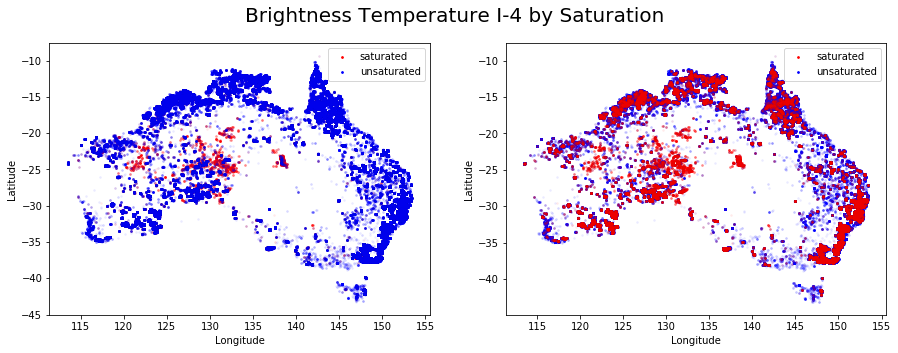

In [7]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
a1 = ax[0].scatter('longitude', 'latitude', data = df[df.saturated == True], alpha = 0.05, s = 3, c = 'r')
a2 = ax[0].scatter('longitude', 'latitude', data = df[df.saturated == False], alpha = 0.05, s = 3, c = 'b')
a3 = ax[1].scatter('longitude', 'latitude', data = df[df.saturated == False], alpha = 0.05, s = 3, c = 'b')
a4 = ax[1].scatter('longitude', 'latitude', data = df[df.saturated == True], alpha = 0.05, s = 3, c = 'r')
fig.suptitle('Brightness Temperature I-4 by Saturation', fontsize = 20)
l1 = ax[0].legend((a1,a2),('saturated','unsaturated'))
for lh in l1.legendHandles: 
    lh.set_alpha(1)
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
l2 = ax[1].legend((a4,a3),('saturated','unsaturated'))
for lh in l2.legendHandles: 
    lh.set_alpha(1)
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude');

### How does that impact the result?
#### We can see that the order of the plotting of the two groups impacts how dense the anomalies for each group seems compared to the other.
#### In the first one, as we plotted the longitude and latitude of the "saturated" group first (which we've observed in the previous question to be the smaller group), we can see that the "saturated" group looks very trivial compared to the "unsaturated" group. We can only observe a concentration of the "saturated" group in the middle of Australia, where the "unsaturated" group is the least populated.
#### On the other hand, although we can still observe that most of the anomalies is contributed by the "unsaturated" group, we can see that we can still observe concentrations of the "saturated" group across Australia, especially in the Coastal regions.

### 2.4 Any better ways to compare the two distributions?

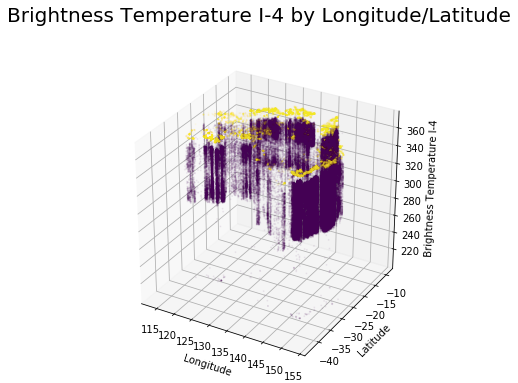

In [8]:
from mpl_toolkits.mplot3d import Axes3D
s = df.sample(frac=0.2, replace=False, random_state=1)
fig = plt.figure(figsize = (6,6))
fig.suptitle('Brightness Temperature I-4 by Longitude/Latitude', fontsize = 20)
ax=fig.add_subplot(
    111, projection = '3d')
ax.scatter(s.longitude, s.latitude, s.bright_ti4, c = s.saturated, alpha = 0.05, s = 1);
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Brightness Temperature I-4');

####  Visualizing the distribution of brightness temperature I-4 level across different longitude/latitude using scatterplots allowed us to visualize the geographical distribution and compare that across the saturated group and the unsaturated group. However, one problem with which was that it compromises specific information about brightness temperature I-4 level.
  
####  As a result, I decided to add a 3-D scatterplot where we would be able to visualize the brightness temperature I-4 level at each longitude/latitude combination. The 3-D plot also allows us to combine the two groups, but at the same time distinguish them by color. The added dimension allows us to better distinguish the two groups as there is no overlap in layers, and at the same time visualize the distribution and density of data points across space.